# Task 1.1. 

## Practical task. Titanic data analysis

In [1]:
%pylab inline
import seaborn as sns
import pandas as pd

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Reading data from a file into memory as a Pandas.DataFrame object

In [2]:
data = pd.read_csv('titanic_train.csv')

**Data is presented in the form of a table. Let's take a look at the first 5 lines:**

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Let's take the first 10 elements of the Parch column - the number of parents and children of the passenger on board:**

In [4]:
data['Parch'][:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    2
9    0
Name: Parch, dtype: int64

**We select passengers who boarded in Cherbourg (Embarked = C) and paid more than 200 USD. (fare> 200).**

Make sure you understand how this design works. <br />
If not, see how the expression in brackets is evaluated.

In [5]:
data[(data['Embarked'] == 'C') & (data['Fare'] > 200)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C


**1. How many men / women were on board?**

In [6]:
men_count = data[data['Sex'] == 'male'].shape[0]
women_count = data[data['Sex'] == 'female'].shape[0]
print(f"Men count: {men_count}")
print(f"Women count: {women_count}")

Men count: 577
Women count: 314


**2. Print the distribution of deaths/survivors for Pclass (socioeconomic status). Additionally - the same distribution, but taking into account gender. (no tables, only plot)**

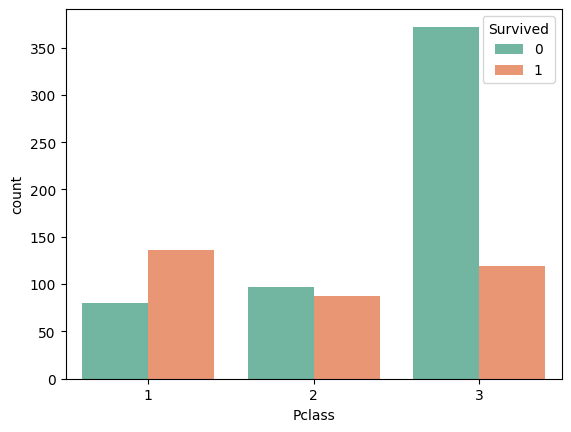

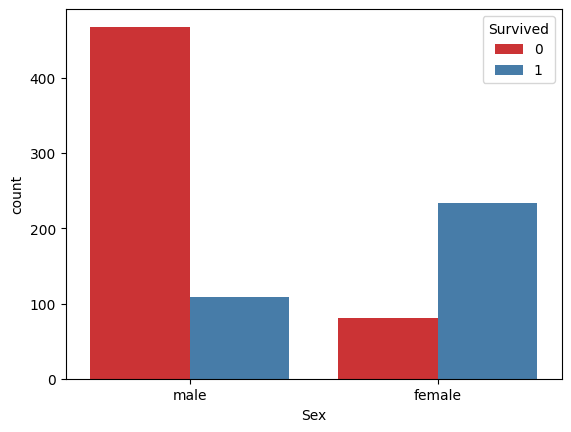

In [7]:
sns.countplot(x='Pclass', hue='Survived', data=data, palette='Set2')
plt.show()
sns.countplot(x='Sex', hue='Survived', data=data, palette='Set1')
plt.show()

**3. How much did one passenger pay on average? Find the variance of this quantity. How much did all passengers pay in total?**

In [8]:
# Your code here
# Average fare per passenger
average_fare = data['Fare'].mean()
print(f"Average fare per passenger: {average_fare}")

# Variance of fare per passenger
fare_variance = data['Fare'].var()
print(f"Variance of fare per passenger: {fare_variance}")

# Total fare paid by all passengers
total_fare = data['Fare'].sum()
print(f"Total fare paid by all passengers: {total_fare}")

Average fare per passenger: 32.204207968574636
Variance of fare per passenger: 2469.436845743116
Total fare paid by all passengers: 28693.9493


**4. Is it true that young people survived more often (more likely) than old people? Let "young" - those who are under 30, and "old" - those who are over 60.**

In [9]:
n1 = data[(data['Age']<30)]['Survived'].mean()
n2 = data[(data['Age']>60)]['Survived'].mean()
print('young:'+str(n1))
print('old:'+str(n2))
if n1>n2 :
    print('true')
else:
    print('false')

young:0.40625
old:0.22727272727272727
true


**5. Is it true that women survived more often than men?**

In [10]:
n1 = data[(data['Sex'] == 'female')]['Survived'].mean()
n2 = data[(data['Sex'] == 'male')]['Survived'].mean()
print('female:'+str(n1))
print('male:'+str(n2))
if n1>n2 :
    print('true')
else:
    print('false')

female:0.7420382165605095
male:0.18890814558058924
true


**6. What's the most popular name among male Titanic passengers?**

In [11]:
from collections import Counter
arr = []
d = data[(data['Sex'] == 'male')]
# d.loc[np.random.randint(d.shape[0], size=2)]
for i in range(577):
    arr.append(d.iloc[i]['Name'].split('.',1)[1].split(' ',2)[1])
# print(arr)
result = Counter(arr).most_common()
print('The most popular name among male Titanic passengers is {},which occurs {} times'.format(result[0][0],result[0][1]))
print(result)

Most popular male name: Braund, Mr. Owen Harris
The most popular name among male Titanic passengers is William,which occurs 35 times
[('William', 35), ('John', 25), ('George', 14), ('Charles', 13), ('Thomas', 13), ('Henry', 12), ('James', 11), ('Richard', 10), ('Edward', 9), ('Johan', 9), ('Karl', 8), ('Frederick', 8), ('Arthur', 7), ('Alfred', 7), ('Joseph', 6), ('Samuel', 6), ('Robert', 6), ('Ernest', 5), ('Albert', 5), ('Victor', 5), ('Harry', 5), ('Peter', 5), ('Ivan', 4), ('Daniel', 4), ('Walter', 4), ('David', 4), ('Patrick', 4), ('August', 4), ('Hans', 4), ('Ernst', 4), ('Alexander', 3), ('Hanna', 3), ('Stephen', 3), ('Percival', 3), ('Martin', 3), ('Frank', 3), ('Reginald', 3), ('Rene', 3), ('Jakob', 3), ('Francis', 3), ('Nils', 3), ('Benjamin', 3), ('Leo', 3), ('Tannous', 3), ('Owen', 2), ('Timothy', 2), ('Anders', 2), ('Eugene', 2), ('Lawrence', 2), ('Lalio', 2), ('Manuel', 2), ('Juha', 2), ('Hugh', 2), ('Lee', 2), ('Emil', 2), ('Bertram', 2), ('Gustaf', 2), ('Edvard', 2), ('

**7. Compare the distribution of ticket prices between the rescued and the dead. (plots)**

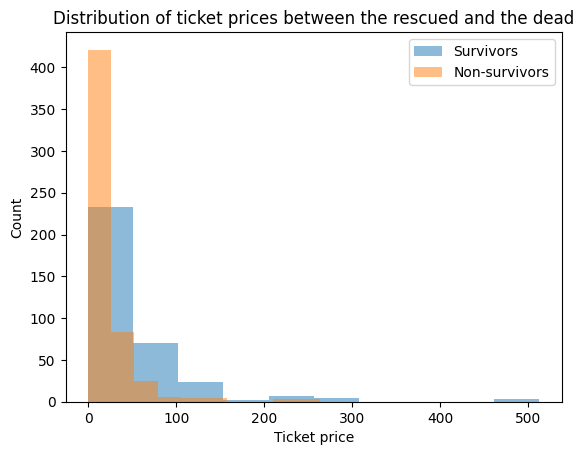

In [12]:
# Ticket prices for survivors
survivor_fares = data[data['Survived'] == 1]['Fare']

# Ticket prices for non-survivors
non_survivor_fares = data[data['Survived'] == 0]['Fare']

plt.hist(survivor_fares, alpha=0.5, label='Survivors')
plt.hist(non_survivor_fares, alpha=0.5, label='Non-survivors')
plt.title('Distribution of ticket prices between the rescued and the dead')
plt.xlabel('Ticket price')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

**8. How does the average age of men / women differ by class of service?**

In [13]:
# Average age of men and women by class of service
age_by_class = data.groupby(['Pclass', 'Sex'])['Age'].mean()
print(age_by_class)

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64
